In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader, Dataset

# Learning rate

## Triangular

In [3]:
lr_optimal = 1e-2
div_factor = 25
iterations = 400

iter1 = int(0.45 * iterations)
iter2 = int(1.0 * iter1)
iter3 = iterations - iter1 - iter2

lr_low = lr_optimal/div_factor
lr_high = lr_optimal

delta_1 = (lr_high - lr_low) / iter1
delta_2 = (lr_high - lr_low) / (iter2 - 1)
lrs1 = [lr_low + i * delta_1 for i in range(iter1)]
lrs2 = [lr_high - i * delta_2 for i in range(0, iter2)]
delta_3 = (lrs2[-1] - lr_low / 100) / iter3
lrs3 = [lrs2[-1] - i * delta_3 for i in range(1, iter3 + 1)]

out_lr = lrs1 + lrs2 + lrs3

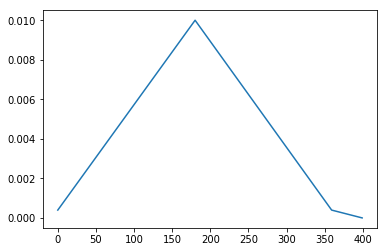

In [4]:
plt.plot(out_lr)
plt.show()

## Triangular + Cosine Annealing

In [5]:
def annealing_cos_phase2(start, end, pct=0.35):
    "Cosine anneal from `start` to `end` as pct goes from 0.0 to 1.0."
    cos_out = np.cos(np.pi * pct) + 1
    return end + (start - end)/2 * cos_out

In [99]:
lr_optimal = 1e-2
div_factor = 25
pct_start = 0.35
tot_epochs = 4

iterations = len(train_dl) * tot_epochs
iter1 = int(pct_start * iterations)
iter2 = iterations - iter1

lr_max = lr_optimal
lr_low = lr_max/div_factor

lrs1 = annealing_cos(lr_low, lr_max, pct_start)
lrs1 = annealing_cos(lr_max, lr_low/1e4)
lr_low = lr_optimal/div_factor
lr_high = lr_optimal



out_lr = lrs1 + lrs2

In [ ]:
plt.plot(out_lr)
plt.show()

# Momentum

In [6]:
mom_low = 0.85
mom_high = 0.95
step_size = 40

iterations = 10 * step_size
iter1 = int(0.45 * iterations)
iter2 = int(1.0 * iter1)
iter3 = iterations - iter1 - iter2

delta_1 = (mom_high - mom_low) / iter1
delta_2 = (mom_high - mom_low) / (iter2 - 1)
moms1 = [mom_high - i * delta_1 for i in range(iter1)]
moms2 = [mom_low + i * delta_2 for i in range(0, iter2)]
moms3 = [moms2[-1] for i in range(1, iter3 + 1)]

out = moms1 + moms2 + moms3

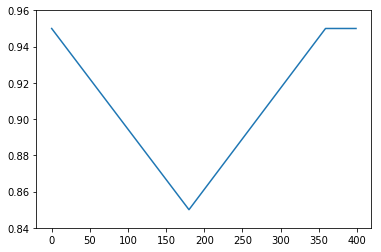

In [7]:
plt.plot(out)
plt.ylim(0.84, 0.96)
plt.show()